# Simple Linear Regression Model To Predic CO2 Emission From Fuel Consumption

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl
%matplotlib inline

In [2]:
df=pd.read_excel("Fuel_Consumption.xlsx")

In [3]:
df.head()

,Model_Year,Make,Model,Vehicle_Class,Engine_Size_L,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_L_per_100_km,Fuel_Consumption_Hwy_L_per_100_km,Fuel_Consumption_Comb_L_per_100_km,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_per_km,CO2_Rating,Smog_Rating
0,2020,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,199,6,3
1,2020,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS9,Z,12.3,9.2,10.9,26,254,4,3
2,2020,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6,AS9,Z,12.2,9.5,11.0,26,258,4,3
3,2020,Acura,MDX Hybrid AWD,SUV: Small,3.0,6,AM7,Z,9.1,9.0,9.0,31,210,5,3
4,2020,Acura,RDX AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6


In [4]:
df.describe()

,Model_Year,Engine_Size_L,Cylinders,Fuel_Consumption_City_L_per_100_km,Fuel_Consumption_Hwy_L_per_100_km,Fuel_Consumption_Comb_L_per_100_km,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_per_km,CO2_Rating,Smog_Rating
count,878.0,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,2020.0,3.163895,5.658314,12.353531,9.073235,10.876310,27.715262,252.362187,4.542141,4.509112
std,0.0,1.361419,1.906448,3.385707,2.108181,2.771538,7.562496,59.483244,1.709835,1.749874
min,2020.0,1.000000,3.000000,4.200000,4.000000,4.100000,13.000000,96.000000,1.000000,1.000000
25%,2020.0,2.000000,4.000000,10.000000,7.600000,9.000000,23.000000,210.000000,3.000000,3.000000
50%,2020.0,3.000000,6.000000,12.000000,8.800000,10.600000,27.000000,250.000000,4.000000,5.000000
75%,2020.0,3.800000,6.000000,14.400000,10.300000,12.500000,31.000000,290.000000,5.000000,6.000000
max,2020.0,8.000000,16.000000,26.800000,18.100000,22.200000,69.000000,522.000000,10.000000,7.000000


In [5]:
cdf=df[["Model_Year",
"Cylinders",
"Fuel_Consumption_Comb_mpg",
"CO2_Emissions_g_per_km",
"Smog_Rating"]]

In [6]:
cdf.head(9)

,Model_Year,Cylinders,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_per_km,Smog_Rating
0,2020,4,33,199,3
1,2020,6,26,254,3
2,2020,6,26,258,3
3,2020,6,31,210,3
4,2020,4,29,232,6
5,2020,4,27,241,6
6,2020,6,34,196,7
7,2020,4,32,209,3
8,2020,6,29,228,3


In [7]:
viz=cdf[["Model_Year",
"Cylinders",
"Fuel_Consumption_Comb_mpg",
"CO2_Emissions_g_per_km"]]

In [8]:
viz

,Model_Year,Cylinders,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_per_km
0,2020,4,33,199
1,2020,6,26,254
2,2020,6,26,258
3,2020,6,31,210
4,2020,4,29,232
...,...,...,...,...
873,2020,4,30,219
874,2020,4,29,232
875,2020,4,27,240
876,2020,4,29,232


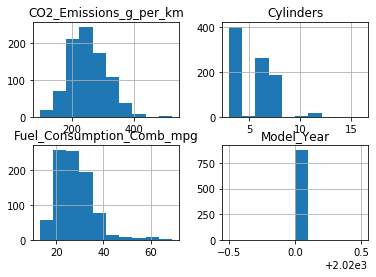

In [9]:
viz.hist()
plt.show()

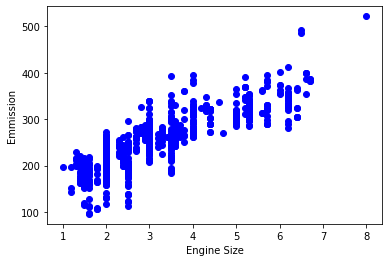

In [10]:
plt.scatter(df.Engine_Size_L, df.CO2_Emissions_g_per_km,  color='blue')
plt.xlabel("Engine Size")
plt.ylabel("Emmission")
plt.show()

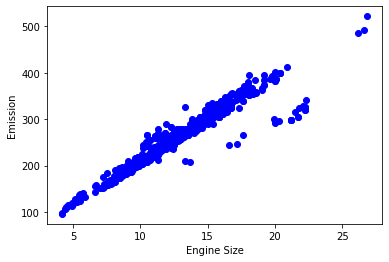

In [11]:
plt.scatter(df.Fuel_Consumption_City_L_per_100_km, df.CO2_Emissions_g_per_km,  color='blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

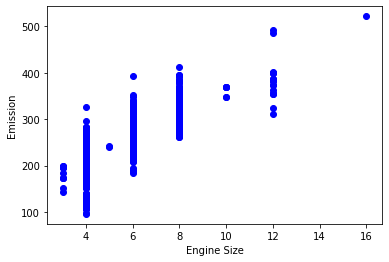

In [12]:
plt.scatter(df.Cylinders, df.CO2_Emissions_g_per_km,  color='blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

# Train/Test Splitting

In [13]:
msk=np.random.rand(len(df))<0.8
train=df[msk]
test=df[~msk]

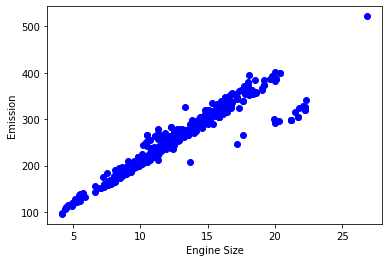

In [14]:
plt.scatter(train.Fuel_Consumption_City_L_per_100_km , train.CO2_Emissions_g_per_km,  color='blue' )
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

# Model

In [15]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
x_train=np.asanyarray(train[['Fuel_Consumption_City_L_per_100_km']])
y_train=np.asanyarray(train[['CO2_Emissions_g_per_km']])
regr.fit(x_train,y_train)
print("coefficient-",regr.coef_)
print("Intercept-",regr.intercept_)

coefficient- [[16.47050945]]
Intercept- [48.20996524]


Text(0, 0.5, 'Emission')

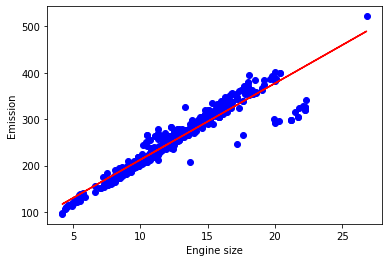

In [16]:
plt.scatter(train.Fuel_Consumption_City_L_per_100_km , train.CO2_Emissions_g_per_km,  color='blue' )
plt.plot(x_train, regr.coef_[0][0]*x_train + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [17]:
from sklearn.metrics import r2_score
x_test=np.asanyarray(test[['Fuel_Consumption_City_L_per_100_km']])
y_test=np.asanyarray(test[['CO2_Emissions_g_per_km']])
y_hat_test = regr.predict(x_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat_test - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat_test - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_hat_test , y_test) )

Mean absolute error: 9.98
Residual sum of squares (MSE): 247.04
R2-score: 0.90


Text(0, 0.5, 'Emission')

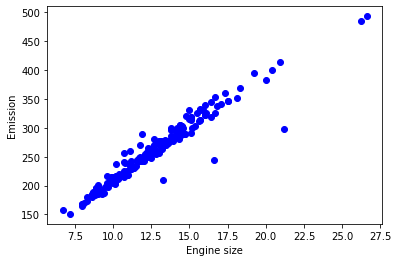

In [18]:
plt.scatter(test.Fuel_Consumption_City_L_per_100_km , test.CO2_Emissions_g_per_km,  color='blue' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

Text(0, 0.5, 'Emission')

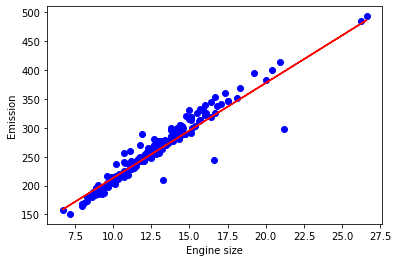

In [19]:
plt.scatter(test.Fuel_Consumption_City_L_per_100_km , test.CO2_Emissions_g_per_km,  color='blue' )
plt.plot(x_test, regr.coef_[0][0]*x_test + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [20]:
x=np.asanyarray([[9.7]])
print(x)
y_a=regr.predict(x)
print(y_a)
# Actual Prediction for the above value of x is 203

[[9.7]]
[[207.97390691]]
